<a href="https://colab.research.google.com/github/samir-surjuse/Daily-Household-Transactions/blob/main/Daily_Household_Transactions_samir_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import files
uploaded = files.upload()


Saving Daily Household Transactions.csv to Daily Household Transactions.csv


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Load dataset
df = pd.read_csv("Daily Household Transactions.csv")

df.head()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR


In [13]:
# Shape आणि first few rows पाहू
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

Shape: (2461, 8)
Columns: ['Date', 'Mode', 'Category', 'Subcategory', 'Note', 'Amount', 'Income/Expense', 'Currency']


In [14]:
# Column names साफ करणे
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('/', '_').str.replace('-', '_')

print("Cleaned column names:", df.columns.tolist())

Cleaned column names: ['Date', 'Mode', 'Category', 'Subcategory', 'Note', 'Amount', 'Income_Expense', 'Currency']


In [15]:
# Missing values count
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Date                0
Mode                0
Category            0
Subcategory       635
Note              521
Amount              0
Income_Expense      0
Currency            0
dtype: int64


In [16]:
# Duplicate rows count
print("\nDuplicate rows:", df.duplicated().sum())


Duplicate rows: 9


In [18]:
# Amount column clean करणे
df['Amount'] = df['Amount'].astype(str)  # string मध्ये बदल
df['Amount'] = df['Amount'].str.replace(r'[^\d\.\-]', '', regex=True)  # symbols, text काढून टाकणे
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')  # number मध्ये बदलणे

# Stats पाहू
print(df['Amount'].describe())

count      2461.000000
mean       2751.145380
std       12519.615804
min           2.000000
25%          35.000000
50%         100.000000
75%         799.000000
max      250000.000000
Name: Amount, dtype: float64


In [19]:
# Date column निवडणे
date_col = 'Date'   # जर column नाव वेगळं असेल तर इथे बदल

# String साफ करणे
df[date_col] = df[date_col].astype(str).str.strip()

# Date parsing (dayfirst=True कारण आपल्या dataset मध्ये DD/MM/YYYY format आहे)
df['parsed_date'] = pd.to_datetime(df[date_col], dayfirst=True, errors='coerce')

# Check किती values parse झाल्या
print("Valid dates parsed:", df['parsed_date'].notna().sum(), "out of", len(df))


Valid dates parsed: 1303 out of 2461


In [20]:
# Date features तयार करणे
df['date_only'] = df['parsed_date'].dt.date
df['year'] = df['parsed_date'].dt.year
df['month'] = df['parsed_date'].dt.month
df['month_name'] = df['parsed_date'].dt.month_name()
df['dayofweek'] = df['parsed_date'].dt.day_name()
df['hour'] = df['parsed_date'].dt.hour

# Sample पाहू
print(df[['parsed_date', 'year', 'month', 'month_name', 'dayofweek', 'hour']].head())

          parsed_date    year  month month_name dayofweek  hour
0 2018-09-20 12:04:08  2018.0    9.0  September  Thursday  12.0
1 2018-09-20 12:03:15  2018.0    9.0  September  Thursday  12.0
2                 NaT     NaN    NaN        NaN       NaN   NaN
3 2018-09-17 23:41:17  2018.0    9.0  September    Monday  23.0
4 2018-09-16 17:15:08  2018.0    9.0  September    Sunday  17.0


In [21]:
# Duplicates काढणे
before = len(df)
df = df.drop_duplicates()
after = len(df)

print(f"Removed {before - after} duplicate rows. Final shape: {df.shape}")

# Cleaned dataset सेव्ह करणे
df.to_csv("daily_transactions_cleaned.csv", index=False)
print("Cleaned data saved as daily_transactions_cleaned.csv")

Removed 9 duplicate rows. Final shape: (2452, 15)
Cleaned data saved as daily_transactions_cleaned.csv


In [23]:
# Basic statistics for Amount
print("Transaction Amount Summary:")
print(df['Amount'].describe())

Transaction Amount Summary:
count      2452.000000
mean       2757.976664
std       12542.057491
min           2.000000
25%          35.000000
50%         100.000000
75%         784.500000
max      250000.000000
Name: Amount, dtype: float64


In [24]:
# Income vs Expense total
print("\nTotal by Income/Expense:")
print(df.groupby('Income_Expense')['Amount'].sum())


Total by Income/Expense:
Income_Expense
Expense         1955380.53
Income          3042397.35
Transfer-Out    1764780.90
Name: Amount, dtype: float64


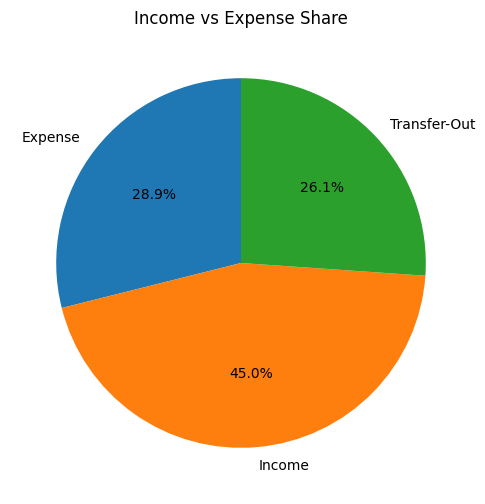

In [34]:
inc_exp_totals = df.groupby('Income_Expense')['Amount'].sum()

plt.figure(figsize=(6,6))
plt.pie(inc_exp_totals, labels=inc_exp_totals.index, autopct="%.1f%%", startangle=90)
plt.title("Income vs Expense Share")
plt.show()


Top 10 Categories by Amount:
Category
Salary                   2526576.45
Money transfer            606528.90
Fixed Deposit             450000.00
Maturity amount           382792.00
Public Provident Fund     345000.00
Share Market              276161.00
Saving Bank account 1     274798.57
Investment                269858.00
Other                     170467.28
Transportation            169053.78
Name: Amount, dtype: float64


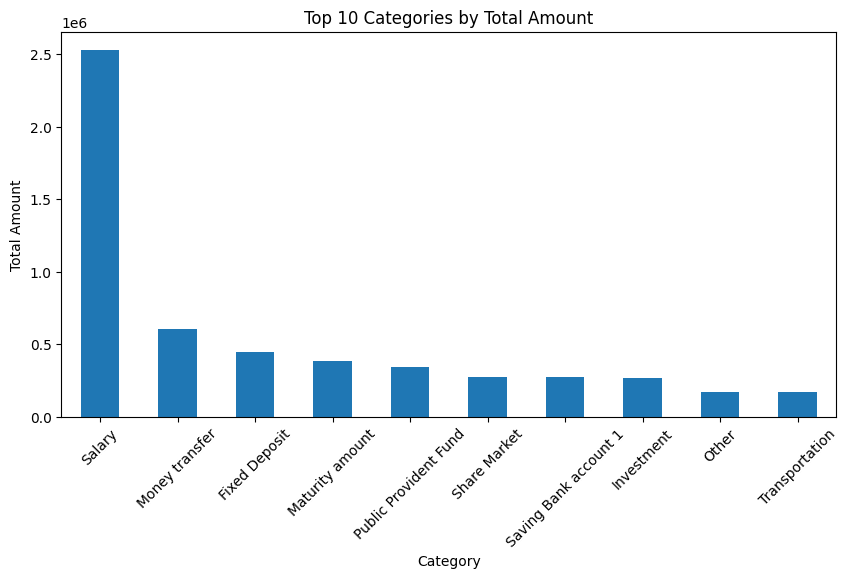

In [42]:
# Top 10 categories by total amount
category_totals = df.groupby('Category')['Amount'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Categories by Amount:")
print(category_totals)

plt.figure(figsize=(10,5))
category_totals.plot(kind='bar')
plt.title("Top 10 Categories by Total Amount")
plt.ylabel("Total Amount")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.show()


Top 10 Categories by Count:
Category
Food              906
Transportation    307
Household         176
subscription      143
Other             126
Investment        101
Health             94
Family             71
Apparel            47
Salary             43
Name: count, dtype: int64


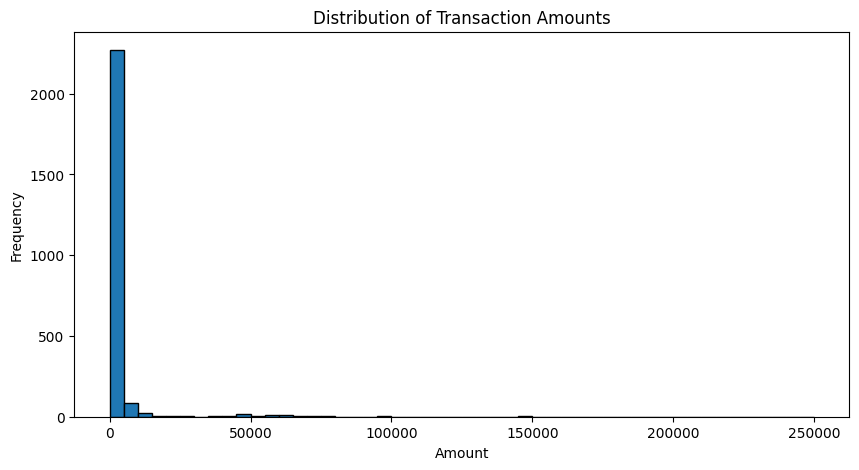

In [41]:
# Top 10 categories by count (किती transactions झाल्या)
category_counts = df['Category'].value_counts().head(10)
print("\nTop 10 Categories by Count:")
print(category_counts)

plt.figure(figsize=(10,5))
plt.hist(df['Amount'], bins=50, edgecolor='black')
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

/tmp/ipython-input-258583427.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.set_index('parsed_date').resample('M')['Amount'].sum()



Monthly totals (first 12 months):
parsed_date
2015-01-31     4434.0
2015-02-28    56516.0
2015-03-31    77315.8
2015-04-30    53097.0
2015-05-31    68935.0
2015-06-30    49057.0
2015-07-31    50657.0
2015-08-31    65313.0
2015-09-30    53004.0
2015-10-31    58574.0
2015-11-30    52295.0
2015-12-31    81691.0
Name: Amount, dtype: float64


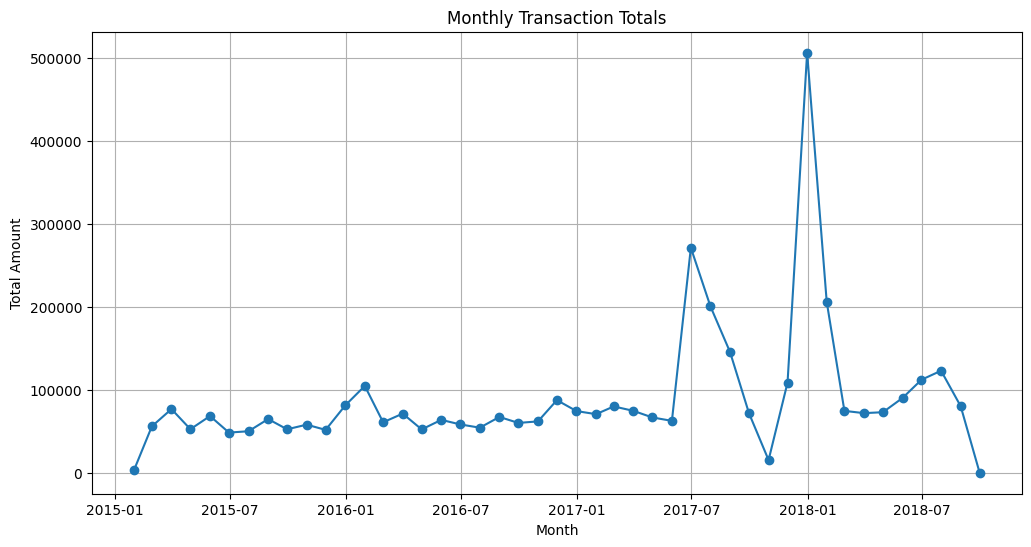

In [40]:
# Monthly totals
monthly = df.set_index('parsed_date').resample('M')['Amount'].sum()
print("\nMonthly totals (first 12 months):")
print(monthly.head(12))

plt.figure(figsize=(12,6))
plt.plot(monthly.index, monthly.values, marker='o')
plt.title("Monthly Transaction Totals")
plt.xlabel("Month")
plt.ylabel("Total Amount")
plt.grid(True)
plt.show()


Daily totals (first 10 days):
parsed_date
2015-01-13    510.0
2015-01-14    893.0
2015-01-15    265.0
2015-01-16     90.0
2015-01-17      0.0
2015-01-18     97.0
2015-01-19     29.0
2015-01-20     65.0
2015-01-21    687.0
2015-01-22     53.0
Name: Amount, dtype: float64


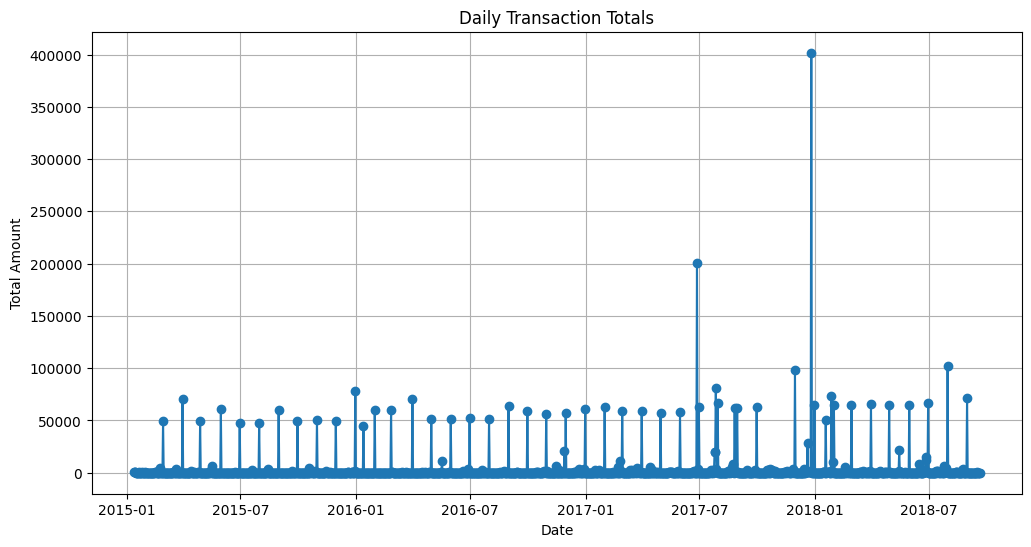

In [39]:
# Daily totals
daily = df.set_index('parsed_date').resample('D')['Amount'].sum()
print("\nDaily totals (first 10 days):")
print(daily.head(10))

# Plot
plt.figure(figsize=(12,6))
plt.plot(daily.index, daily.values, marker='o', linestyle='-')
plt.title("Daily Transaction Totals")
plt.xlabel("Date")
plt.ylabel("Total Amount")
plt.grid(True)
plt.show()

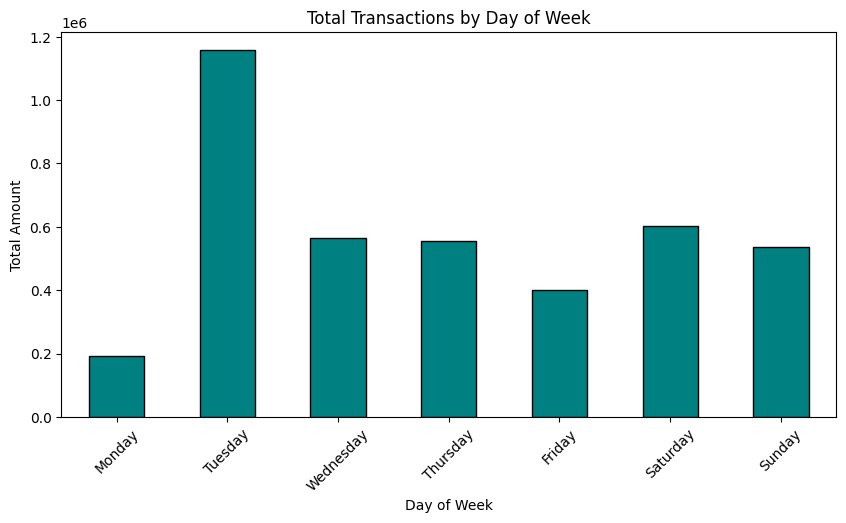

In [38]:
# Day-of-week totals
dow_totals = df.groupby('dayofweek')['Amount'].sum()

# Days क्रमाने लावणे (Mon → Sun)
dow_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
dow_totals = dow_totals.reindex(dow_order)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
dow_totals.plot(kind='bar', color='teal', edgecolor='black')
plt.title("Total Transactions by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Total Amount")
plt.xticks(rotation=45)
plt.show()

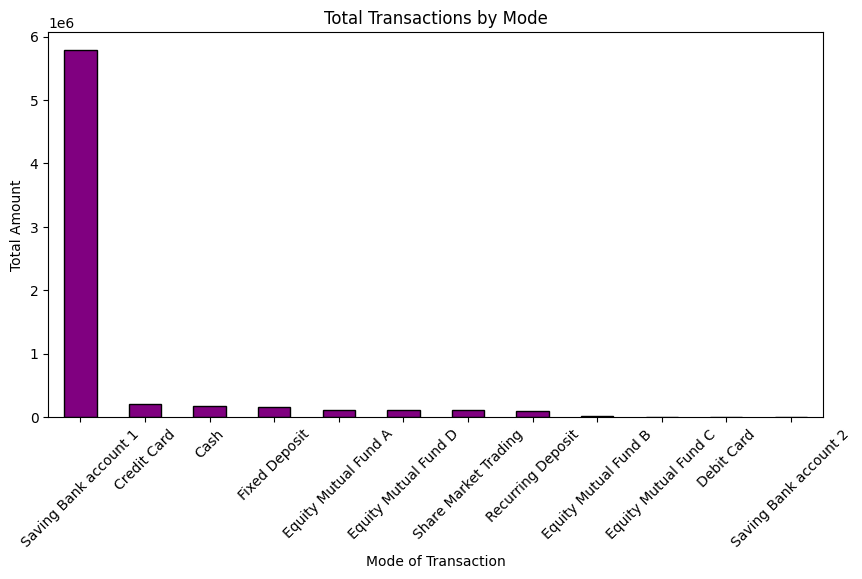

In [43]:
# Mode-wise totals
mode_totals = df.groupby('Mode')['Amount'].sum().sort_values(ascending=False)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
mode_totals.plot(kind='bar', color='purple', edgecolor='black')
plt.title("Total Transactions by Mode")
plt.xlabel("Mode of Transaction")
plt.ylabel("Total Amount")
plt.xticks(rotation=45)
plt.show()


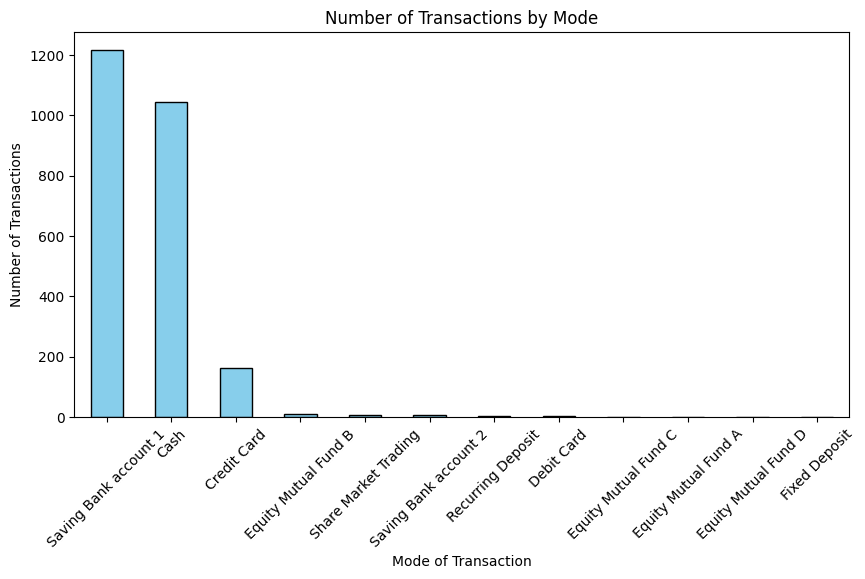

In [44]:
# Count of transactions by mode
mode_counts = df['Mode'].value_counts()

plt.figure(figsize=(10,5))
mode_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Number of Transactions by Mode")
plt.xlabel("Mode of Transaction")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.show()


In [46]:
# Download the cleaned CSV
files.download("daily_transactions_cleaned.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>